### Regresión Lineal V
## Normalización

In [1]:
import pandas as pd
import numpy as np


import seaborn as sns
import matplotlib.pyplot as plt


from scipy import stats
import math 
from sklearn.preprocessing import MinMaxScaler


import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None 

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.

En vuestro dataset habréis identificado unas variables predictoras y una variable respuesta. 

In [2]:
df = pd.read_csv("../datos/supermarket_limpio.csv", index_col = 0)

In [3]:
df.head(2)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,Rating,hora_compra,mes_compra
Invoice ID,,,,,,,,,,,,,
750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,9.1,Mañana,January
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,9.6,Mañana,March


Los objetivos del pair programming de hoy son:

Sobre la variable respuesta, en pair programmings anterior identificastéis si seguía una distribución normal o no. En caso de que no siguiera una distribución normal, normalizarla. Podéis usar el método que prefiráis o el que mejor se ajuste

In [4]:
df['RATING_BOX'], lambda_ajustada = stats.boxcox(df['Rating'])

In [5]:
lambda_ajustada

0.7459396304810274

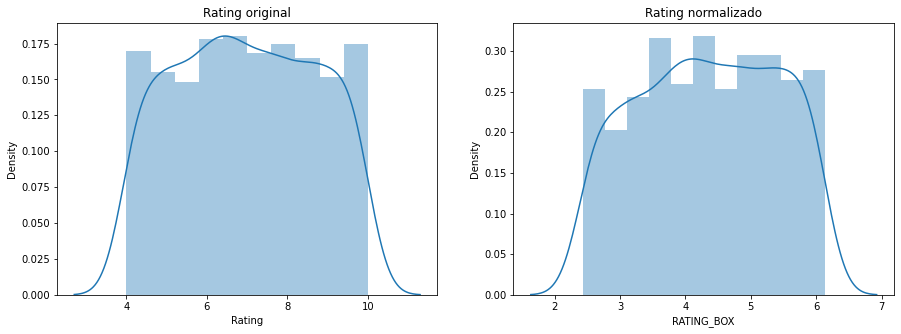

In [6]:
fig, axes = plt.subplots(1,2, figsize = (15,5))

axes[0].set_title('Rating original')
axes[1].set_title('Rating normalizado')

sns.distplot(df['Rating'], ax = axes[0])
sns.distplot(df['RATING_BOX'], ax = axes[1]);


In [7]:
stats.shapiro(df['Rating'])

ShapiroResult(statistic=0.9581990838050842, pvalue=2.6858377142073477e-16)

Con el método BOX-COX no conseguimos que los datos sean normales, por lo tanto no podremos hacer el modelo de ML de regresión lineal.
Vamos a probar no obstante con otro método para ver qué pasaría.

In [8]:
df['RATING_LOG'] = df['Rating'].apply(lambda x: np.log(x) if x > 0 else 0)

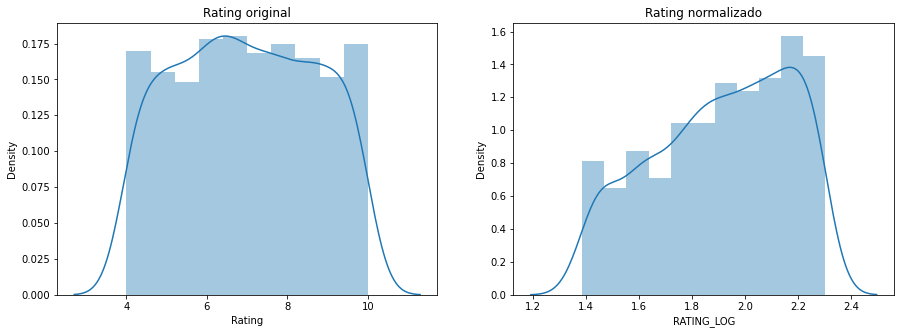

In [9]:
fig, axes = plt.subplots(1, 2, figsize = (15, 5))

axes[0].set_title('Rating original')
axes[1].set_title('Rating normalizado')

sns.distplot(df['Rating'], ax = axes[0])
sns.distplot(df['RATING_LOG'], ax = axes[1]);

In [10]:
stats.shapiro(df['RATING_LOG'])

ShapiroResult(statistic=0.9511435031890869, pvalue=1.0418627673958552e-17)

Hemos probado también el método logarítimico y como esperábamos tampoco normaliza la variable.


Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings

In [11]:
df.to_csv('../datos/supermarket_no_normalizado.csv')